In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from urllib.request import urlretrieve
import pickle

import os
import gzip
import numpy as np
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline

/Users/sakares/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
with open('mnist.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data = u.load()

In [100]:
 X_train, y_train = data[0]

In [71]:
a = data[0][0][1]
print(a.shape)
print(len(a))
print(a[0])
print(type(a))

(784,)
784
0.0
<class 'numpy.ndarray'>


In [101]:
type(data)

tuple

In [96]:
type(data[0])

tuple

In [102]:
type(X_train)

numpy.ndarray

In [98]:
type(y_train)

numpy.ndarray

In [91]:
X_train, y_train = data[0]

In [93]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [94]:
type(y_train)

numpy.ndarray

In [85]:
X_train = X_train.reshape((-1, 1, 28, 28))

In [86]:
X_train.shape


(50000, 1, 28, 28)

In [84]:
X_train.shape


(50000, 784)

In [27]:
def load_dataset():
    url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    filename = 'mnist.pkl.gz'
    if not os.path.exists(filename):
        print("Downloading MNIST dataset...")
        urlretrieve(url, filename)
    
    # you need to extract .gz manually
    with open('mnist.pkl', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        data = u.load()
        
#     print(data)
    X_train, y_train = data[0]
    X_val, y_val = data[1]
    X_test, y_test = data[2]
    X_train = X_train.reshape((-1, 1, 28, 28))
    X_val = X_val.reshape((-1, 1, 28, 28))
    X_test = X_test.reshape((-1, 1, 28, 28))
    y_train = y_train.astype(np.uint8)
    y_val = y_val.astype(np.uint8)
    y_test = y_test.astype(np.uint8)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [28]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

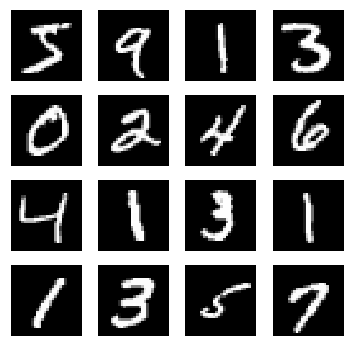

In [29]:
figs, axes = plt.subplots(4, 4, figsize=(6, 6))
for i in range(4):
    for j in range(4):
        axes[i, j].imshow(X_train[i + 4 * j].reshape(28, 28), cmap='gray', interpolation='none')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
#         axes[i, j].set_title("Label: {}".format(y[i + 4 * j]))
        axes[i, j].axis('off')

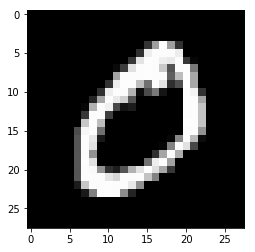

In [26]:
plt.imshow(X_train[1][0], cmap='gray')

In [30]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=20,
    verbose=1,
    )


In [31]:
# Train the network
nn = net1.fit(X_train, y_train)

# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.82187     0.15340    5.35784      0.95522  51.25s
      2     0.25369     0.10295    2.46415      0.96952  51.38s
      3     0.19229     0.08198    2.34568      0.97581  52.94s
      4     0.15484     0.07024    2.20426      0.97851  51.76s
      5     0.13378     0.06209    2.15458      0.98241  51.97s
      6     0.11753     0.05697    2.06291      0.98311  54.82s
      7     0.10617     0.05292    2.00611      0.98451  52.21s
      8     0.09936     0.05192    1.91355      0.98471  52.16s
      9     0.09627     0.04665    2.06388      0.98

In [32]:
preds = net1.predict(X_test)

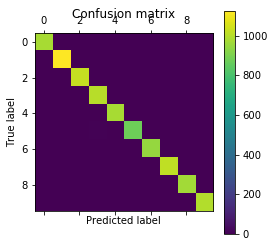

In [33]:
cm = confusion_matrix(y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<module 'matplotlib.pyplot' from '/Users/sakares/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

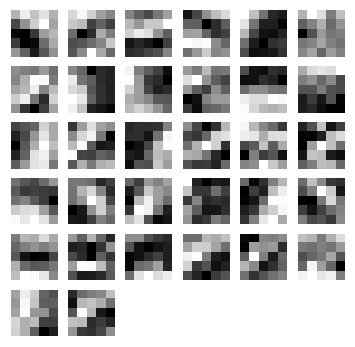

In [34]:
visualize.plot_conv_weights(net1.layers_['conv2d1'])

In [36]:
sample_X = X_train[1:2]

<module 'matplotlib.pyplot' from '/Users/sakares/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

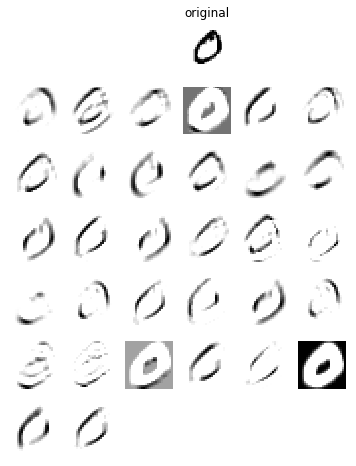

In [37]:
visualize.plot_conv_activity(net1.layers_['conv2d1'],sample_X)

<module 'matplotlib.pyplot' from '/Users/sakares/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

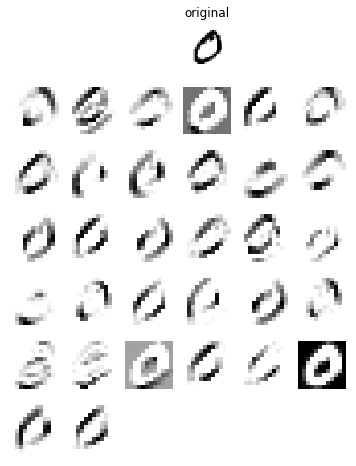

In [ ]:
visualize.plot_conv_activity(net1.layers_['maxpool1'],sample_X)

In [ ]:
visualize.plot_conv_weights(net1.layers_['conv2d2'])

In [ ]:
visualize.plot_conv_activity(net1.layers_['conv2d2'],sample_X)

In [ ]:
visualize.plot_conv_activity(net1.layers_['maxpool2'],sample_X)

In [ ]:
visualize.plot_conv_activity(net1.layers_['dropout1'],sample_X)

In [44]:
# visualize.plot_conv_activity(net1.layers_['dense'],sample_X) # 1-Dimension and cannot be rendered

In [46]:
# visualize.plot_conv_activity(net1.layers_['dropout2'],sample_X) # 1-Dimension and cannot be rendered